In [1]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Train_path='chest_xray/chest_xray/train' 
Test_path='chest_xray/chest_xray/test' 

In [3]:
import os
import numpy as np
import cv2

def load_Data(dir):
    Categories = ['NORMAL', 'PNEUMONIA']
    X_arr = []  # input array
    Y_arr = []  # output array
    for i in Categories:
        dem = 0
        print(f'loading... category : {i}')
        path = os.path.join(dir, i)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize(img_array,(100, 100))
            X_arr.append(img_resized.flatten()/255)
            Y_arr.append(Categories.index(i))
            # if dem == 1341: 
            #     break 
            # else:
            #     dem += 1
        print(f'loaded category:{i} successfully')
        print('-'*50)
    print("Completed!")
    return X_arr, Y_arr


In [4]:
X_train,y_train=load_Data(Train_path)

loading... category : NORMAL
loaded category:NORMAL successfully
--------------------------------------------------
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully
--------------------------------------------------
Completed!


In [5]:
X_test,y_test=load_Data(Test_path)

loading... category : NORMAL
loaded category:NORMAL successfully
--------------------------------------------------
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully
--------------------------------------------------
Completed!


<BarContainer object of 2 artists>

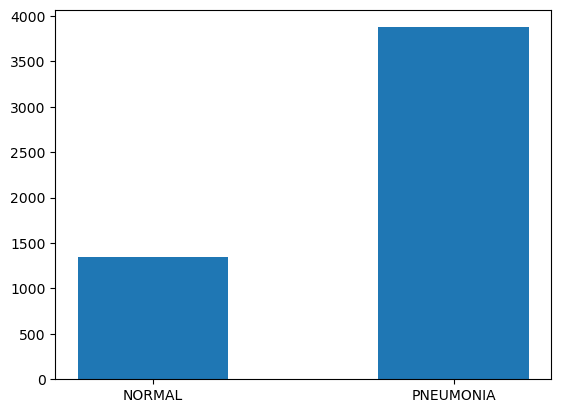

In [6]:
from collections import Counter
d=Counter(y_train)               
plt.bar(['NORMAL','PNEUMONIA'], d.values(),width=0.5)

In [7]:

from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X_train)

In [8]:
X_new

array([[ 2.88951561e+00, -4.46693876e+00, -4.21300445e-03, ...,
         6.52455960e-62,  6.15813443e-71, -5.84342588e-73],
       [-1.46380529e+01, -1.96182126e+00, -7.89301606e+00, ...,
         3.39820982e-31, -3.86799637e-32,  2.63146469e-31],
       [-2.11089020e+00, -1.31744647e+01,  4.53639064e-01, ...,
        -7.15490281e-31,  1.30013568e-31, -1.35629900e-31],
       ...,
       [ 4.14621335e+00,  5.29498128e+00, -4.58087254e-01, ...,
         1.90723475e-30, -2.88504470e-31, -5.23794703e-31],
       [ 1.53579173e+01, -2.52590749e+00,  4.22977444e+00, ...,
         1.76767775e-31, -4.98854764e-31, -1.52778207e-31],
       [-5.37935255e+00,  3.93959912e+00,  4.26823778e+00, ...,
        -1.85056198e-30, -2.99315386e-31, -4.61340315e-31]])

In [9]:
explained_variance=pca.explained_variance_ratio_
len(explained_variance[explained_variance>0.0001])

423

In [10]:
X_train

[array([0.08627451, 0.08627451, 0.08627451, ..., 0.35686275, 0.35686275,
        0.35686275]),
 array([0.07058824, 0.07058824, 0.07058824, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.        , ..., 0.00784314, 0.00784314,
        0.00784314]),
 array([0.16470588, 0.16470588, 0.16470588, ..., 0.04705882, 0.04705882,
        0.04705882]),
 array([0.31764706, 0.31764706, 0.31764706, ..., 0.        , 0.        ,
        0.        ]),
 array([0.37254902, 0.37254902, 0.37254902, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.        ,
        0.        ]),
 array([0.03921569, 0.03921569, 0.03921569, ..., 0.        , 0.        ,
        0.        ]),
 array([0.22745098, 0.22745098, 0.22745098, ..., 0.        , 0.        ,
        0.        ]),
 array([0.43137255, 0.43137255, 0.43137255, ..., 0.        , 0.        ,
        0.        ]),
 array([0.0

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=373)
X_train=pca.fit_transform(X_train)

In [12]:
X_train

array([[ 2.88951561e+00, -4.46693876e+00, -4.21300445e-03, ...,
         5.67934125e-02, -2.22336642e-01, -3.71590226e-01],
       [-1.46380529e+01, -1.96182126e+00, -7.89301606e+00, ...,
        -4.84393557e-02,  1.34894101e-02,  5.48074901e-02],
       [-2.11089020e+00, -1.31744647e+01,  4.53639064e-01, ...,
         3.87752898e-02, -3.86693956e-01,  2.35198452e-01],
       ...,
       [ 4.14621335e+00,  5.29498128e+00, -4.58087254e-01, ...,
         2.58412242e-01, -1.52009482e-01, -3.40446358e-01],
       [ 1.53579173e+01, -2.52590749e+00,  4.22977444e+00, ...,
        -2.16984917e-01, -9.29161315e-02,  8.55665911e-03],
       [-5.37935255e+00,  3.93959912e+00,  4.26823778e+00, ...,
         1.47912629e-01,  2.16306916e-01, -5.73581498e-02]])

In [13]:
X_test=pca.transform(X_test)

In [14]:
from sklearn.svm import SVC
clf_SVM=SVC(C=0.1,kernel='rbf' )
clf_SVM.fit(X_train,y_train)


SVC(C=0.1)